In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()
customer_df.shape

(9134, 24)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
def snake_case(df):
    cols = []
    for c in df.columns:
        cols.append(c.lower())
    df.columns = cols
    cols_ = df.columns.str.replace(' ', '_')
    df.columns = cols_
    return df

customer_df = snake_case(customer_df)
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
def discr_cont(df):
    cat = df.select_dtypes(include=np.object)
    continuous = []
    discrete = []
    
    for c in df.select_dtypes(include=np.number):
        if len(df[c].unique()) < 10:
            discrete.append(c)
        else:
            continuous.append(c)
    return cat, continuous, discrete

cat, continuous, discrete = discr_cont(customer_df)

/var/folders/q5/ywjsx89514x2b_9dvdlcfngw0000gn/T/ipykernel_1577/2928848546.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(include=np.object)


In [6]:

continuous_df = pd.DataFrame(data=customer_df,columns=continuous)
discrete_df = pd.DataFrame(data=customer_df,columns=discrete)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


<AxesSubplot:>

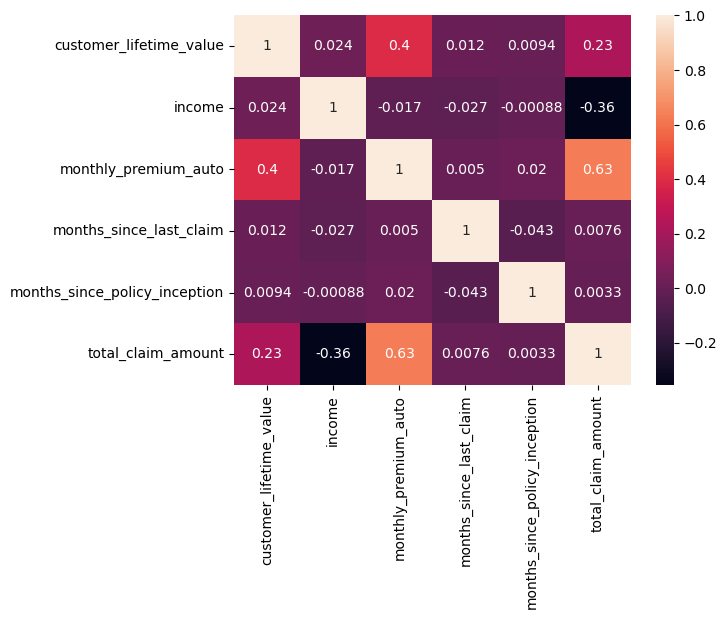

In [7]:
correl_matrix_cont = continuous_df.corr()
sns.heatmap(correl_matrix_cont,annot=True)


<AxesSubplot:>

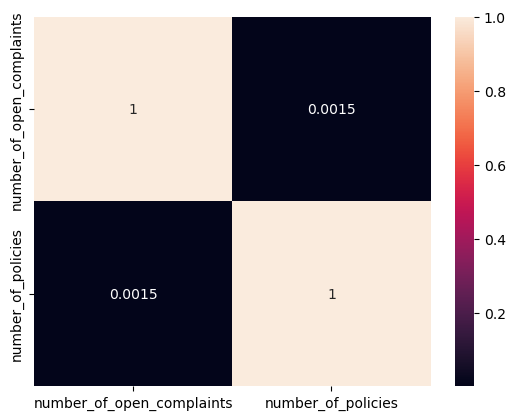

In [8]:
correl_matrix_disc = discrete_df.corr()
sns.heatmap(correl_matrix_disc,annot=True)

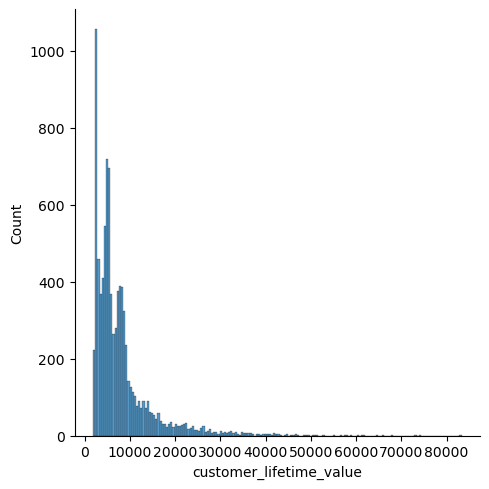

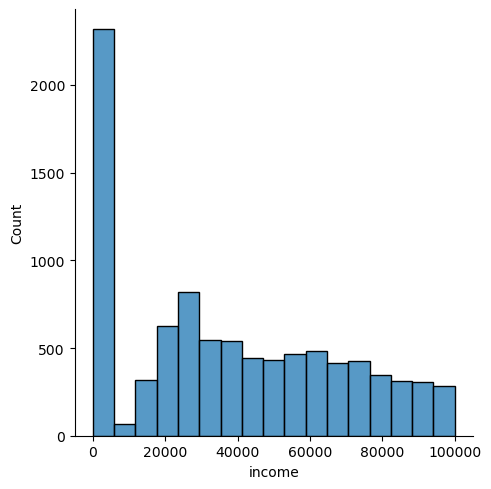

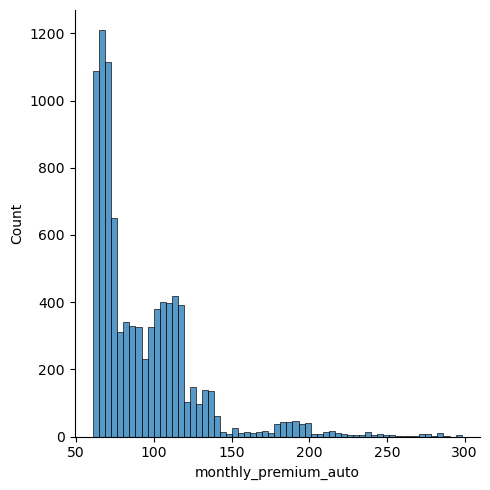

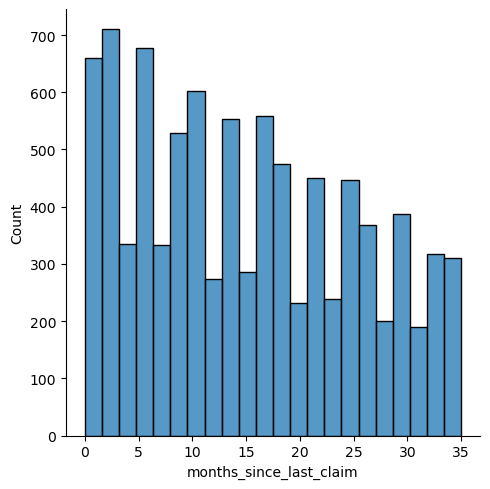

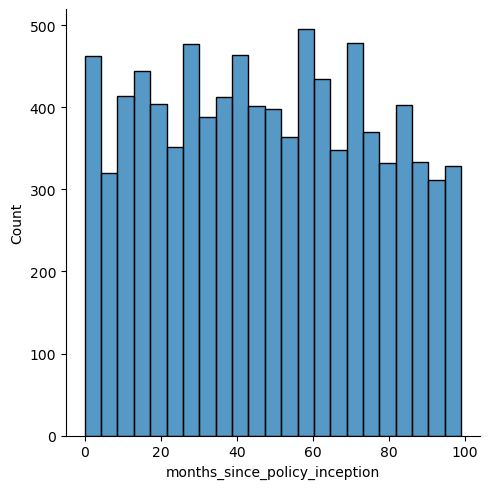

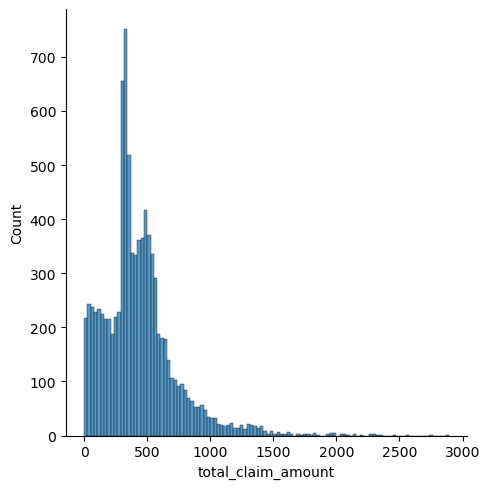

In [9]:
def displot_cont(df):
    for c in df:
        sns.displot(x=c, data=df)
        plt.show()
    return None

displot_cont(continuous_df)

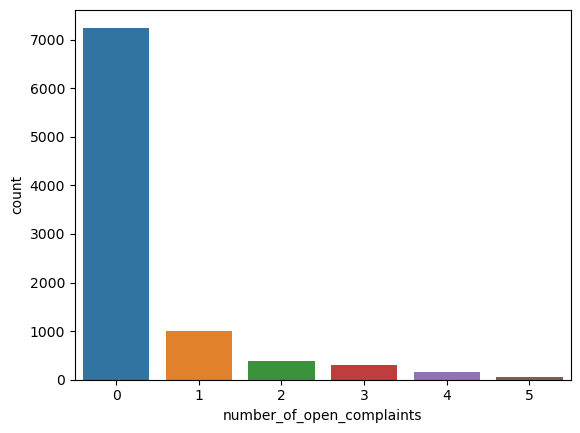

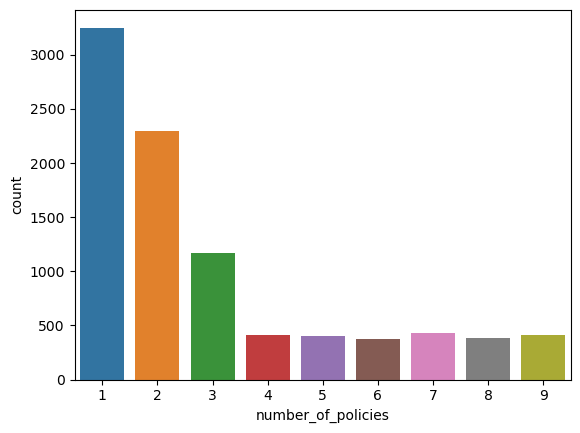

In [10]:
def countplot_disc(df):
    for c in df:
        sns.countplot(x=c, data=df)
        plt.show()
    return None

countplot_disc(discrete_df)

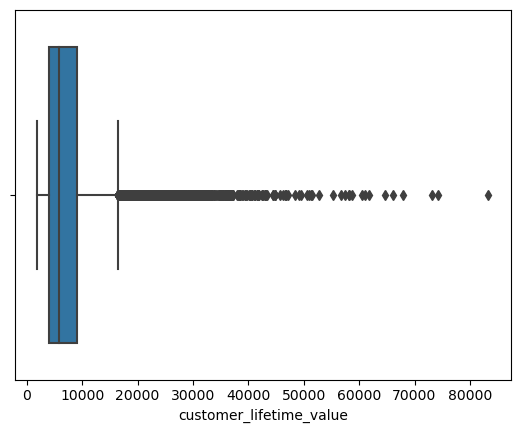

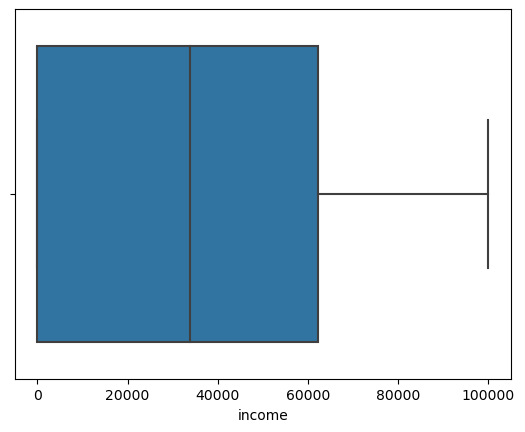

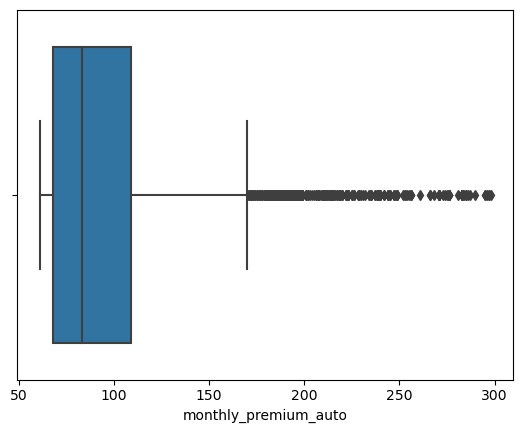

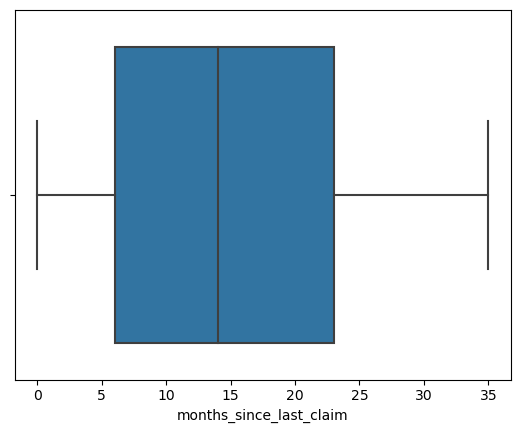

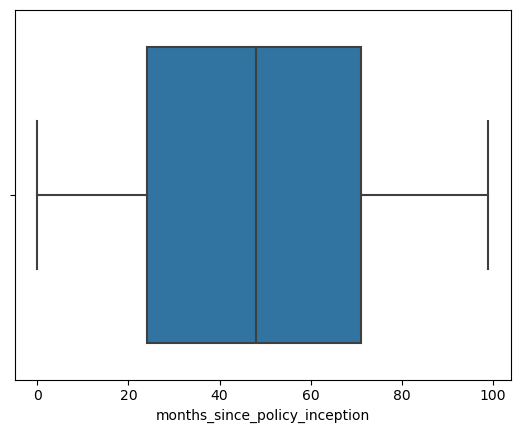

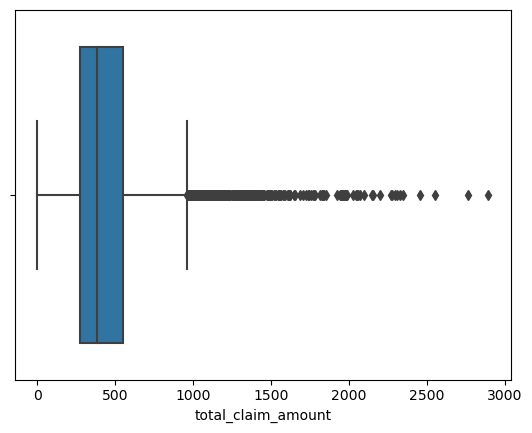

In [11]:
def box_cont(df):
    for c in df:
        sns.boxplot(x=c, data=df)
        plt.show()
    return None

box_cont(continuous_df)

In [12]:
iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5 * iqr
outliers = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(outliers)


def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

for column in continuous_df:
    if column != 'total_claim_amount':
        continuous_df[column] = continuous_df[column].apply(log_transform)

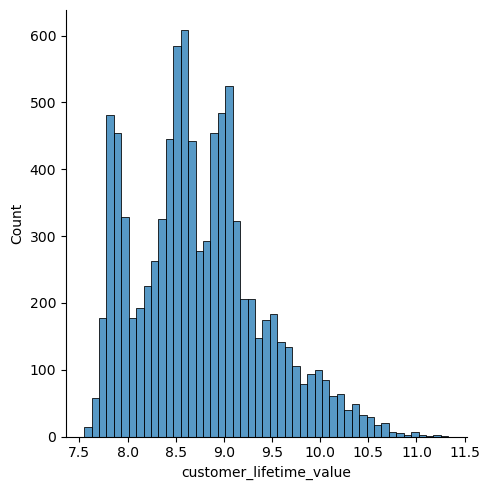

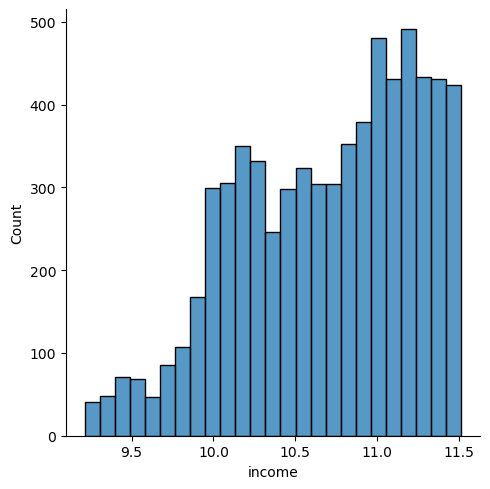

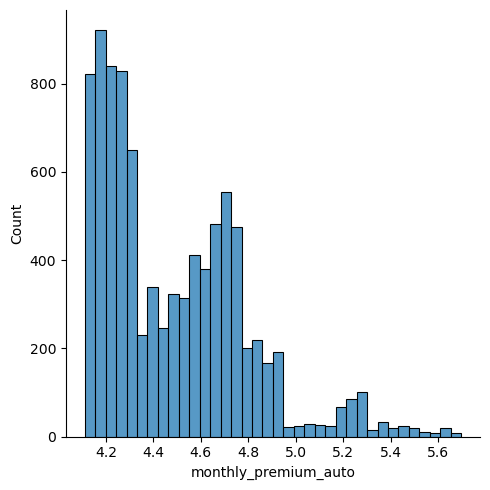

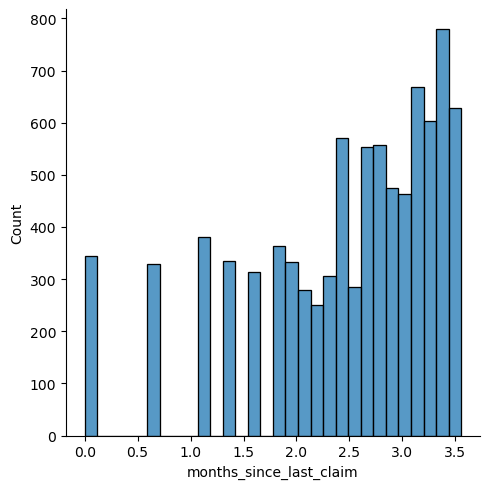

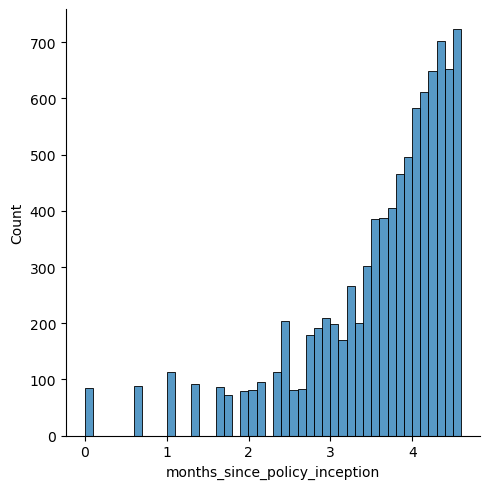

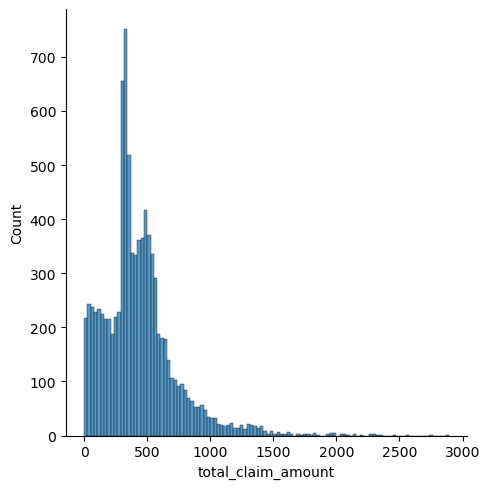

In [13]:
def displot_cont(df):
    for c in df:
        sns.displot(x=c, data=df)
        plt.show()
    return None

displot_cont(continuous_df)

In [14]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5 * iqr
outliers = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
len(outliers)

128

In [15]:
continuous_df.isna().sum()

customer_lifetime_value             0
income                           2317
monthly_premium_auto                0
months_since_last_claim           314
months_since_policy_inception      83
total_claim_amount                  0
dtype: int64

In [16]:
for c in continuous_df:
        if continuous_df[c].isna().sum() > 0:
            continuous_df[c] = continuous_df[c].fillna(np.mean(continuous_df[c]))

In [17]:
continuous_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
dtype: int64

In [18]:
def cleanstate(x):
    if x == 'Nevada':
        return 'Other'
    elif x == 'Washington':
        return 'Other'
    else:
        return x

cat['state'] = cat['state'].apply(cleanstate)

In [19]:
def cleaneducation(x):
    if x == 'Master':
        return 'Other'
    elif x == 'Doctor':
        return 'Other'
    else:
        return x

cat['education'] = cat['education'].apply(cleaneducation)

In [20]:
def cleanemployment(x):
    if x == 'Medical Leave':
        return 'Other'
    elif x == 'Disabled':
        return 'Other'
    elif x == 'Retired':
        return 'Other'
    else:
        return x

cat['employmentstatus'] = cat['employmentstatus'].apply(cleanemployment)

In [21]:

def cleanpolicy(x):
    if 'Corporate' in x:
        return 'Corporate'
    elif 'Personal' in x:
        return 'Personal'
    elif 'Special' in x:
        return 'Special'
    
cat['policy'] = cat['policy'].apply(cleanpolicy)

In [22]:
def cleanvehicleclass(x):
    if x == 'Sports Car':
        return 'Other'
    elif x == 'Luxury SUV':
        return 'Other'
    elif x == 'Luxury Car':
        return 'Other'
    else:
        return x
    
cat['vehicle_class'] = cat['vehicle_class'].apply(cleanvehicleclass)

In [23]:
categorical_features = pd.concat([cat, discrete_df], axis=1)
categorical_features.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints,number_of_policies
0,BU79786,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize,0,1


In [24]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [25]:
customer_df2 = pd.concat([categorical_features, continuous_df,customer_df['effective_to_date']], axis=1)
customer_copy = customer_df2.copy()
customer_copy = customer_copy.drop(['customer'],axis=1) 
customer_copy.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,...,vehicle_size,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,effective_to_date
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,...,Medsize,0,1,7.924260,10.937988,4.234107,3.465736,1.609438,384.811147,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,...,Medsize,0,8,8.850738,10.694229,4.543295,2.564949,3.737670,1131.464935,2011-01-31
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,...,Medsize,0,2,9.464008,10.794809,4.682131,2.890372,3.637586,566.472247,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,...,Medsize,0,7,8.941920,10.694229,4.663439,2.890372,4.174387,529.881344,2011-01-20
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,...,Medsize,0,1,7.942253,10.688211,4.290459,2.484907,3.784190,138.130879,2011-02-03


In [26]:
y = customer_copy['total_claim_amount']
X = customer_copy.drop(['total_claim_amount'],axis=1)
continuous_copy = customer_copy[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception']]
continuous_copy.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,7.924260,10.937988,4.234107,3.465736,1.609438
1,8.850738,10.694229,4.543295,2.564949,3.737670
2,9.464008,10.794809,4.682131,2.890372,3.637586
3,8.941920,10.694229,4.663439,2.890372,4.174387
4,7.942253,10.688211,4.290459,2.484907,3.784190


In [27]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(continuous_copy)
normalized = transformer.transform(continuous_copy)
normalized = pd.DataFrame(normalized,columns=continuous_copy.columns)
normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,0.099340,0.749969,0.077690,0.974795,0.350249
1,0.344314,0.643927,0.272611,0.721434,0.813400
2,0.506471,0.687682,0.360138,0.812964,0.791619
3,0.368424,0.643927,0.348354,0.812964,0.908439
4,0.104098,0.641309,0.113216,0.698921,0.823524


In [28]:
categorical_copy = categorical_features.copy()
one_hot = categorical_copy[['state','marital_status','policy','renew_offer_type','sales_channel','vehicle_class']]
ordinal = categorical_copy[['coverage','employmentstatus','location_code','vehicle_size']]

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(one_hot)
encoded_onehot = encoder.transform(one_hot).toarray()

encoded_columns = list()
dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            dropped_columns.append(column)
            encoded_columns.append(column)
            condition = False
        else:
            encoded_columns.append(column)

onehot_encoded = pd.DataFrame(data = encoded_onehot, columns=encoded_columns)
onehot_encoded = onehot_encoded.drop(columns = dropped_columns)

onehot_encoded.head()

,California,Oregon,Other,Married,Single,Personal,Special,Offer2,Offer3,Offer4,Branch,Call Center,Web,Other,SUV,Two-Door Car
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
ordinal['coverage'].value_counts()
ordinal['employmentstatus'].value_counts()
ordinal['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [31]:
ordinal['coverage'] = ordinal['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
ordinal['employmentstatus'] = ordinal['employmentstatus'].map({'Other' : 0, 'Unemployed' : 1, 'Employed' : 2})
ordinal['location_code'] = ordinal['location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['vehicle_size'] = ordinal['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
ordinal.head()

/var/folders/q5/ywjsx89514x2b_9dvdlcfngw0000gn/T/ipykernel_1577/2244303973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal['coverage'] = ordinal['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
/var/folders/q5/ywjsx89514x2b_9dvdlcfngw0000gn/T/ipykernel_1577/2244303973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal['employmentstatus'] = ordinal['employmentstatus'].map({'Other' : 0, 'Unemployed' : 1, 'Employed' : 2})
/var/folders/q5/ywjsx89514x2b_9dvdlcfngw0000gn/T/ipyker

,coverage,employmentstatus,location_code,vehicle_size
0,0,2,1,1
1,1,1,1,1
2,2,2,1,1
3,0,1,1,1
4,0,2,0,1


In [32]:
customer_copy['day'] = customer_copy['effective_to_date'].dt.dayofweek
customer_copy['month'] = customer_copy['effective_to_date'].dt.month

In [33]:

X = pd.concat([ordinal,onehot_encoded,normalized,customer_copy[['number_of_open_complaints','number_of_policies','day','month']]],axis=1)
X.head()

,coverage,employmentstatus,location_code,vehicle_size,California,Oregon,Other,Married,Single,Personal,...,Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,month
0,0,2,1,1,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.099340,0.749969,0.077690,0.974795,0.350249,0,1,3,2
1,1,1,1,1,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.344314,0.643927,0.272611,0.721434,0.813400,0,8,0,1
2,2,2,1,1,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.506471,0.687682,0.360138,0.812964,0.791619,0,2,5,2
3,0,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.368424,0.643927,0.348354,0.812964,0.908439,0,7,3,1
4,0,2,0,1,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.104098,0.641309,0.113216,0.698921,0.823524,0,1,3,2


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [35]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model= lm.fit(X_train,y_train)

In [36]:
score = lm.score(X_test, y_test)
score

0.5483458626874995

In [37]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [38]:
def model_training(models,X_train,y_train):
    models_train = []
    for model in models:
        model.fit(X_train,y_train)
        models_train.append(model)
    return models_train
        
        
trained = model_training([MLPRegressor(max_iter=1000),linear_model.LinearRegression(),KNeighborsRegressor()],X_train,y_train)

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
score_mlp = trained[0].score(X_test, y_test)
score_linear = trained[1].score(X_test, y_test)
score_KNN = trained[2].score(X_test, y_test)

print('MLPRegressor Score:',score_mlp)
print('LinearRegressor Score:',score_linear)
print('KNN Score:',score_KNN)

MLPRegressor Score: 0.8111666762252336
LinearRegressor Score: 0.5483458626874995
KNN Score: 0.5122406429280384
